Airline Fleet Dataset Exploration and Visualization

Dataset includes the following data:

Parent Airline: i.e. International Airlines Group (IAG)

Airline: i.e. Iberia, Aer Lingus, British Airways...etc. which are owned by IAG

Aircraft Type: Manufacturer & Model

Current: Quantity of airplanes in Operation

Future: Quantity of airplanes on order, from planespotter.net

Order: Quantity airplanes on order, from Wikipedia

Unit Cost: Average unit cost ($M) of Aircraft Type, as found by Wikipedia and various google searches

Total Cost: Current quantity * Unit Cost ($M)

Average Age: Average age of "Current" airplanes by "Aircraft Type"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
fleet = pd.read_csv('Fleet Data.csv')

Exploring the dataset:

In [4]:
fleet.head()

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90,$90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$90,$0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,$98,"$3,724",7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$98,$0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$115,$919,10.3


In [6]:
fleet.describe()

,Current,Future,Historic,Total,Orders,Average Age
count,859.000000,188.000000,1113.000000,1484.000000,348.000000,820.000000
mean,24.033760,3.382979,14.513028,24.955526,26.419540,10.115000
std,41.091234,4.656331,23.763373,46.651526,43.024179,6.859362
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000
25%,5.000000,1.000000,3.000000,4.000000,5.000000,5.000000
50%,12.000000,2.000000,7.000000,11.000000,13.500000,8.900000
75%,26.500000,4.000000,16.000000,27.000000,28.250000,14.500000
max,718.000000,38.000000,325.000000,952.000000,400.000000,39.000000


In [7]:
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 11 columns):
Parent Airline          1583 non-null object
Airline                 1583 non-null object
Aircraft Type           1583 non-null object
Current                 859 non-null float64
Future                  188 non-null float64
Historic                1113 non-null float64
Total                   1484 non-null float64
Orders                  348 non-null float64
Unit Cost               1548 non-null object
Total Cost (Current)    1556 non-null object
Average Age             820 non-null float64
dtypes: float64(6), object(5)
memory usage: 136.1+ KB


Number of unique parent airlines:

In [26]:
fleet['Parent Airline'].nunique()

117

Number of unique airlines:

In [27]:
fleet['Airline'].nunique()

280

In [210]:
fleet['Aircraft Type'].nunique()

101

In [260]:
fleet.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [291]:
#Separating quantity and cost data from age:
aircraftfleet = fleet[['Airline','Aircraft Type', 'Current', 'Future', 'Historic', 'Total', 'Orders', 'Total Cost (Current)']]
parentfleet = fleet[['Parent Airline','Aircraft Type', 'Current', 'Future', 'Historic', 'Total', 'Orders', 'Total Cost (Current)']]

In [292]:
aircraftfleet.head(5)

,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Total Cost (Current)
0,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90
1,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,$0
2,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,"$3,724"
3,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,$0
4,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$919


In [293]:
parentfleet.head(5)

,Parent Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Total Cost (Current)
0,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,$90
1,Aegean Airlines,Airbus A319,NaN,NaN,8.0,8.0,NaN,$0
2,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,"$3,724"
3,Aegean Airlines,Airbus A320,NaN,NaN,9.0,9.0,NaN,$0
4,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,$919


<h2> Airlines</h2>

In [289]:
# Grouping data by Airline name to see tha aircraft fleet size including all aircraft type:
aircraftfleet.groupby(axis=0, by='Airline').sum().head(10)

,Current,Future,Historic,Total,Orders
Airline,,,,,
ABX Air,28.0,0.0,117.0,145.0,0.0
ANA Wings,39.0,0.0,12.0,51.0,24.0
Aegean Airlines,47.0,0.0,35.0,82.0,0.0
Aer Lingus,51.0,1.0,86.0,138.0,11.0
Aer Lingus Regional,11.0,0.0,12.0,23.0,0.0
AeroUnion,7.0,0.0,2.0,9.0,0.0
Aeroflot,189.0,2.0,105.0,296.0,161.0
Aerolineas Argentinas,54.0,2.0,117.0,173.0,0.0
Aeromexico,69.0,2.0,154.0,225.0,85.0


In [303]:
# Top 20 Parent Airlines with the biggest currently active aircraft fleet:
aircraftfleet.groupby(by='Airline').sum()['Current'].sort_values(ascending=False).head(20)

Airline
American Airlines          928.0
Delta Airlines             855.0
United Airlines            730.0
Southwest Airlines         718.0
China Southern Airlines    522.0
China Eastern Airlines     451.0
FedEx Express              408.0
Air China                  375.0
RyanAir                    366.0
American Eagle             297.0
Turkish Airlines           295.0
FedEx Feeder Fleet         288.0
British Airways            268.0
Lufthansa                  267.0
Emirates                   249.0
UPS                        236.0
easyJet                    234.0
Air France                 226.0
JetBlue Airways            225.0
All Nippon Airways         215.0
Name: Current, dtype: float64

<h2> Parent Airlines </h2>

In [294]:
# Grouping data by Parent Airline name to see tha aircraft fleet size including all aircraft type:
parentfleet.groupby(axis=0, by='Parent Airline').sum().head(10)

,Current,Future,Historic,Total,Orders
Parent Airline,,,,,
Aegean Airlines,61.0,0.0,59.0,120.0,0.0
Aeroflot,282.0,12.0,153.0,446.0,188.0
Aerolineas Argentinas,80.0,3.0,167.0,250.0,0.0
Air Algerie,56.0,1.0,106.0,163.0,10.0
Air Arabia,46.0,0.0,36.0,82.0,0.0
Air Astana,31.0,0.0,18.0,49.0,13.0
Air Berlin,130.0,9.0,242.0,381.0,5.0
Air Canada,214.0,3.0,376.0,593.0,128.0
Air China,708.0,11.0,229.0,948.0,241.0


In [302]:
# Top20 Airlines with the biggest currently active aircraft fleet:
parentfleet.groupby(by='Parent Airline').sum()['Current'].sort_values(ascending=False).head(50)

Parent Airline
American Airlines          1410.0
Delta Airlines              989.0
Lufthansa                   737.0
United Airlines             730.0
Southwest Airlines          718.0
Air China                   708.0
FedEx Express               696.0
IAG                         608.0
China Eastern Airlines      579.0
Air France/KLM              541.0
China Southern Airlines     522.0
Qantas Airways              367.0
Ryanair                     366.0
LATAM Airlines Chile        347.0
Turkish Airlines            329.0
Hainan Airlines             294.0
Aeroflot                    282.0
Lion Air                    270.0
All Nippon Airways          264.0
easyJet                     260.0
Emirates                    249.0
Avianca                     243.0
UPS Airlines                236.0
JetBlue                     225.0
Alaska Airlines             225.0
Japan Airlines              223.0
Air Canada                  214.0
Skywest                     209.0
SAS Group                   206.0

<h4>Let's explore a bit more in details information about some specific major Parent Airlines operating in Europe, Middle-East and Asia.</h4>

<h4> I'll choose the following airlines:

Air France/KLM,

Aeroflot,

Lufthansa,

Emirates,

American Airlines;</h4>

In [320]:
# Fleet size for these specific airlines:
fleet[(fleet['Parent Airline'] == 'Air France/KLM') | (fleet['Parent Airline'] == 'Aeroflot') | (fleet['Parent Airline'] == 'Lufthansa') | (fleet['Parent Airline'] == 'Emirates') | (fleet['Parent Airline'] == 'American Airlines')].groupby(by='Parent Airline').sum()['Current'].sort_values(ascending=False).head(50)

Parent Airline
American Airlines    1410.0
Lufthansa             737.0
Air France/KLM        541.0
Aeroflot              282.0
Emirates              249.0
Name: Current, dtype: float64

In [361]:
# selected_airlines = fleet[(fleet['Parent Airline'] == 'Air France/KLM') | (fleet['Parent Airline'] == 'Aeroflot') | (fleet['Parent Airline'] == 'Lufthansa') | (fleet['Parent Airline'] == 'Emirates') | (fleet['Parent Airline'] == 'American Airlines')]
selected_airlines = fleet[(fleet['Parent Airline'] == 'Air France/KLM') | (fleet['Parent Airline'] == 'Aeroflot') | (fleet['Parent Airline'] == 'Lufthansa') | (fleet['Parent Airline'] == 'Emirates') | (fleet['Parent Airline'] == 'American Airlines')].copy()

In [350]:
# Top20 oldest currently active aircraft types based on the average age:
selected_airlines[['Parent Airline', 'Aircraft Type','Average Age']].dropna(axis=0).sort_values(by='Average Age', ascending=False).head(20)

,Parent Airline,Aircraft Type,Average Age
195,Air France/KLM,Boeing 747,26.6
378,American Airlines,De Havilland Canada DHC-8 Dash 8,26.1
1005,Lufthansa,Airbus A320,25.4
1077,Lufthansa,Fokker F70 / F100,23.2
389,American Airlines,McDonnell Douglas MD-80,22.2
194,Air France/KLM,Boeing 747,21.7
1041,Lufthansa,Boeing 767,20.9
218,Air France/KLM,Fokker F70 / F100,20.8
997,Lufthansa,Airbus A319,20.0
369,American Airlines,Boeing 767,19.9


In [362]:
# Top20 newest currently active planes:
selected_airlines[['Parent Airline', 'Aircraft Type','Average Age']].dropna(axis=0).sort_values(by='Average Age').head(20)

,Parent Airline,Aircraft Type,Average Age
203,Air France/KLM,Boeing 787 Dreamliner,0.1
1047,Lufthansa,Bombardier BD-500 CSeries,0.3
212,Air France/KLM,Embraer ERJ-170,0.5
383,American Airlines,Embraer ERJ-170,0.6
1045,Lufthansa,Boeing 777,0.7
204,Air France/KLM,Boeing 787 Dreamliner,0.7
1004,Lufthansa,Airbus A320,0.7
371,American Airlines,Boeing 787 Dreamliner,1.2
1003,Lufthansa,Airbus A320,1.3
376,American Airlines,Canadair CRJ-900,1.5


In [363]:
selected_airlines.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

<h4> The following plot demonstrates the distribution of the aircraft types among daughter airlines.
We can see which airline has the biggest variety of the planes.</h4>

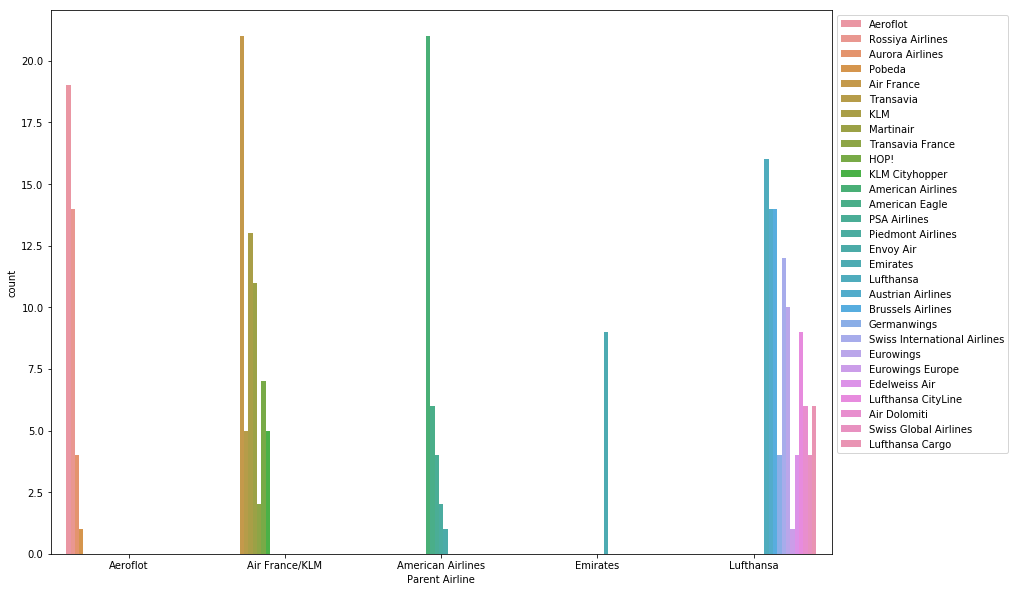

In [378]:
plt.figure(figsize=(14,10))
sns.countplot(data=selected_airlines, x='Parent Airline', hue='Airline')
plt.legend(bbox_to_anchor=(1, 1.0))

In [379]:
# Number of unique aircraft types
selected_airlines['Aircraft Type'].nunique()

60

In [384]:
# Here we can find the number of unique aircraft types used by Emirates:
selected_airlines[selected_airlines['Parent Airline'] == 'Emirates']['Aircraft Type'].nunique()

9

In [389]:
selected_airlines[selected_airlines['Parent Airline'] == 'Emirates'][['Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders']]

,Aircraft Type,Current,Future,Historic,Total,Orders
607,Airbus A300,NaN,NaN,7.0,7.0,NaN
608,Airbus A310,NaN,NaN,13.0,13.0,NaN
609,Airbus A319,1.0,NaN,NaN,1.0,NaN
610,Airbus A330,NaN,NaN,29.0,29.0,NaN
611,Airbus A340,NaN,NaN,18.0,18.0,NaN
612,Airbus A380,87.0,15.0,NaN,102.0,54.0
613,Boeing 737,NaN,NaN,1.0,1.0,NaN
614,Boeing 747,2.0,NaN,4.0,6.0,NaN
615,Boeing 777,159.0,5.0,10.0,174.0,177.0


<h4> Let's explore the average age of the aircraft accross selected Parent Airlines </h4>

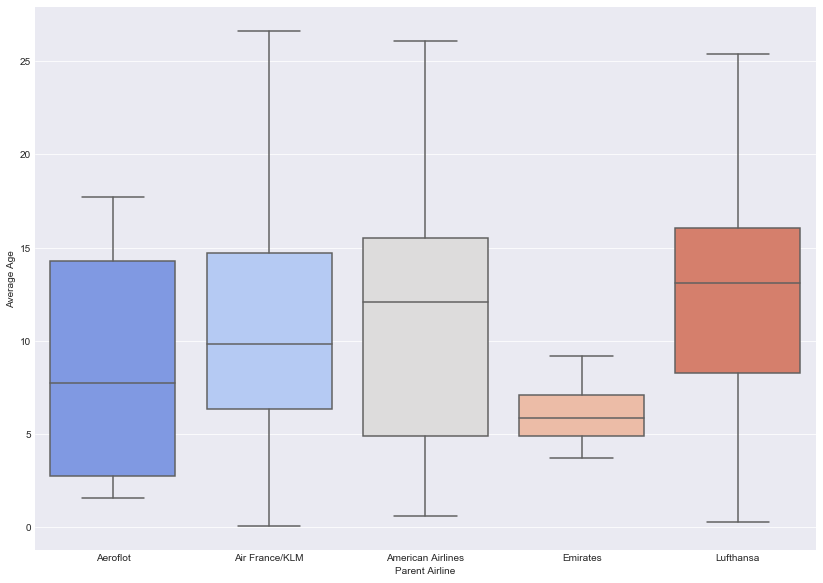

In [419]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
sns.boxplot(data=selected_airlines, x='Parent Airline', y='Average Age', palette='coolwarm')

In [429]:
avg = selected_airlines.dropna(axis=0, subset=['Average Age',])[['Parent Airline','Airline','Aircraft Type','Average Age']]

In [444]:
# List of unique airplanes for these airlines:
avg['Aircraft Type'].unique()

array(['Airbus A319', 'Airbus A320', 'Airbus A321', 'Airbus A330',
       'Boeing 737', 'Boeing 747', 'Boeing 777',
       'De Havilland Canada DHC-8 Dash 8', 'Sukhoi Superjet 100',
       'Airbus A318', 'Airbus A340', 'Airbus A380', 'ATR 42/72',
       'Boeing 787 Dreamliner', 'Canadair CRJ-1000', 'Canadair CRJ-700',
       'Embraer ERJ-145', 'Embraer ERJ-170', 'Embraer ERJ-190',
       'Fokker F70 / F100', 'Boeing 757', 'Boeing 767',
       'Canadair CRJ-100 Series', 'Canadair CRJ-900',
       'McDonnell Douglas MD-80', 'Bombardier BD-500 CSeries',
       'British Aerospace BAe 146/Avro RJ', 'McDonnell Douglas MD-11'], dtype=object)

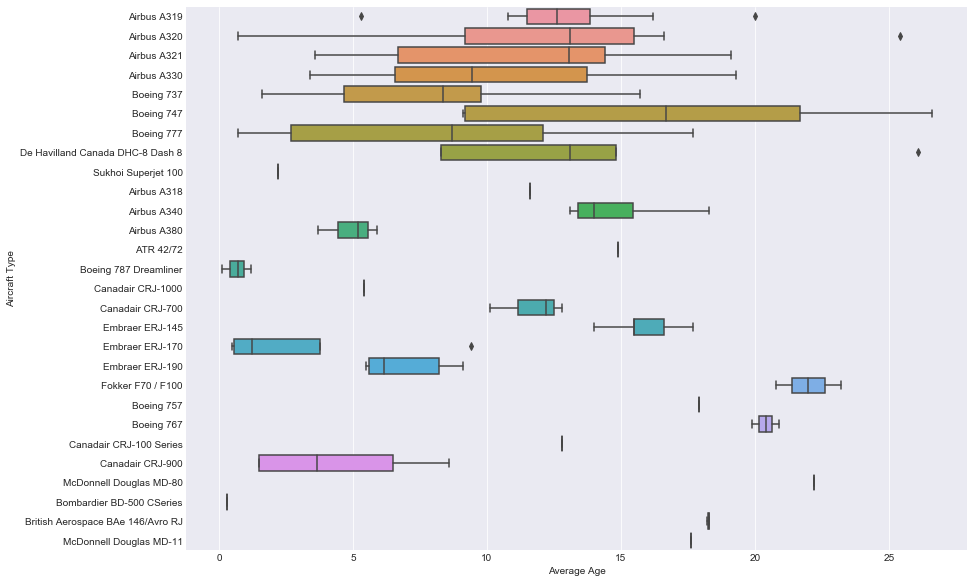

In [441]:
plt.figure(figsize=(14,10))
sns.boxplot(data=avg, y='Aircraft Type', x='Average Age')

<h4> Now let's see the distribution of the big planes like Airbus A380, Airbus A330, Airbus A340, Boeing 747, Boeing 777, Boeing 787 among these selected airlines.<h4>

In [447]:
biggies = selected_airlines[(selected_airlines['Aircraft Type'] == 'Airbus A380') | (selected_airlines['Aircraft Type'] == 'Airbus A330') | (selected_airlines['Aircraft Type'] == 'Airbus A340') | (selected_airlines['Aircraft Type'] == 'Boeing 747') | (selected_airlines['Aircraft Type'] == 'Boeing 777') | (selected_airlines['Aircraft Type'] == 'Boeing 787 Dreamliner')]

In [630]:
biggies.head(5)

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
17,Aeroflot,Aeroflot,Airbus A330,22.0,NaN,NaN,22.0,NaN,$240,"$5,280",5.9
26,Aeroflot,Rossiya Airlines,Boeing 747,7.0,2.0,NaN,9.0,2.0,$316,"$2,211",16.7
29,Aeroflot,Aeroflot,Boeing 777,15.0,NaN,2.0,17.0,1.0,$295,"$4,418",2.5
30,Aeroflot,Rossiya Airlines,Boeing 777,6.0,5.0,1.0,12.0,5.0,$295,"$1,767",17.7
180,Air France/KLM,Air France,Airbus A330,15.0,NaN,1.0,16.0,NaN,$240,"$3,600",14.1


In [631]:
biggies.sort_values('Aircraft Type')[biggies['Current'] > 0][['Parent Airline', 'Airline', 'Aircraft Type', 'Current']].head(20)

C:\Users\kozloiva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Parent Airline,Airline,Aircraft Type,Current
17,Aeroflot,Aeroflot,Airbus A330,22.0
1013,Lufthansa,Lufthansa,Airbus A330,19.0
362,American Airlines,American Airlines,Airbus A330,24.0
1014,Lufthansa,Brussels Airlines,Airbus A330,9.0
1015,Lufthansa,Eurowings,Airbus A330,6.0
1016,Lufthansa,Swiss International Airlines,Airbus A330,14.0
1017,Lufthansa,Edelweiss Air,Airbus A330,2.0
1018,Lufthansa,Brussels Airlines,Airbus A330,9.0
181,Air France/KLM,KLM,Airbus A330,13.0
180,Air France/KLM,Air France,Airbus A330,15.0


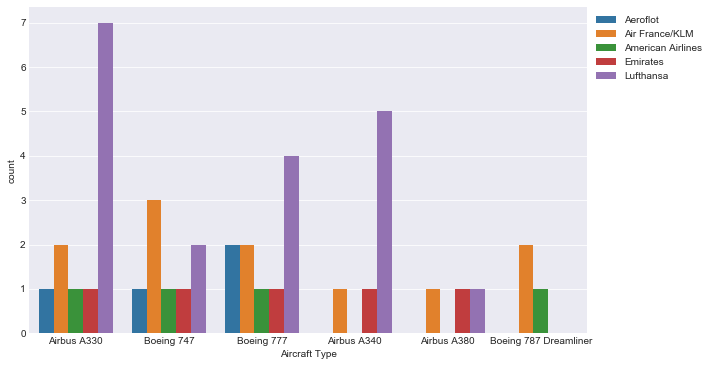

In [456]:
plt.figure(figsize=(10,6))
sns.countplot(data=biggies, x='Aircraft Type', hue='Parent Airline')
plt.legend(bbox_to_anchor=(1, 1.0))

# The plot demonstrates how many Airlines under major daughter airlines use big aircraft.

In [458]:
selected_airlines.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [463]:
bigsorted = biggies.drop(axis=1, columns='Average Age').groupby('Aircraft Type').sum()

In [469]:
bigsorted.head(10).sort_values('Current', ascending=False)

# As we can see the most used type of Aircraft among the selected Airlines is Boeing 777.
# Boeing 787 Dreamliner is quite a new plane and is not that widely used yet.
# Boeing 747 is quite old already and probably most airlines will soone replace these planes with newer ones, like 787.

,Current,Future,Historic,Total,Orders
Aircraft Type,,,,,
Boeing 777,360.0,13.0,14.0,387.0,218.0
Airbus A330,133.0,3.0,60.0,196.0,3.0
Airbus A380,111.0,15.0,0.0,126.0,54.0
Airbus A340,69.0,2.0,66.0,132.0,3.0
Boeing 747,62.0,2.0,188.0,252.0,2.0
Boeing 787 Dreamliner,29.0,9.0,0.0,38.0,48.0


In [475]:
bigsorted = biggies.groupby('Aircraft Type').mean().sort_values('Average Age', ascending=False)

In [478]:
bigsorted['Average Age']

# As we can see below Boeing 747 is indeed in general older that other planes, while Boeing 787 planes are the youngest ones.

Aircraft Type
Boeing 747               16.660000
Airbus A340              14.850000
Airbus A330              10.750000
Boeing 777                8.688889
Airbus A380               4.933333
Boeing 787 Dreamliner     0.666667
Name: Average Age, dtype: float64

In [523]:
airplanes = biggies[['Parent Airline', 'Aircraft Type', 'Current']].copy()

In [524]:
airplanes.dropna(axis=0, subset=['Current',], inplace=True)

In [525]:
airplanes.sort_values('Aircraft Type')

,Parent Airline,Aircraft Type,Current
17,Aeroflot,Airbus A330,22.0
180,Air France/KLM,Airbus A330,15.0
181,Air France/KLM,Airbus A330,13.0
1018,Lufthansa,Airbus A330,9.0
1017,Lufthansa,Airbus A330,2.0
1016,Lufthansa,Airbus A330,14.0
1015,Lufthansa,Airbus A330,6.0
1014,Lufthansa,Airbus A330,9.0
362,American Airlines,Airbus A330,24.0
1013,Lufthansa,Airbus A330,19.0


In [544]:
airplanes = airplanes.groupby(by=['Parent Airline', 'Aircraft Type']).sum()

In [553]:
airplanes = airplanes.reset_index()

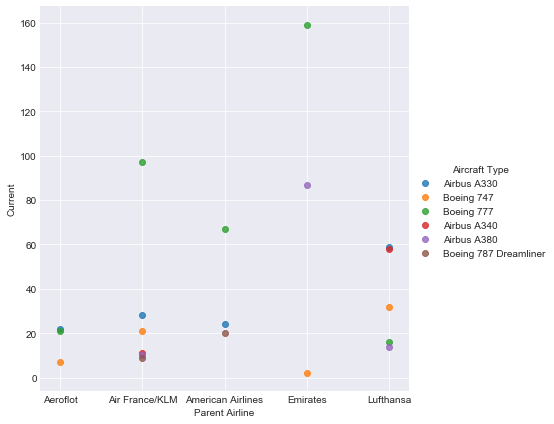

In [584]:
sns.lmplot(x='Parent Airline', y='Current', hue='Aircraft Type', data=airplanes, fit_reg=False, size=6)

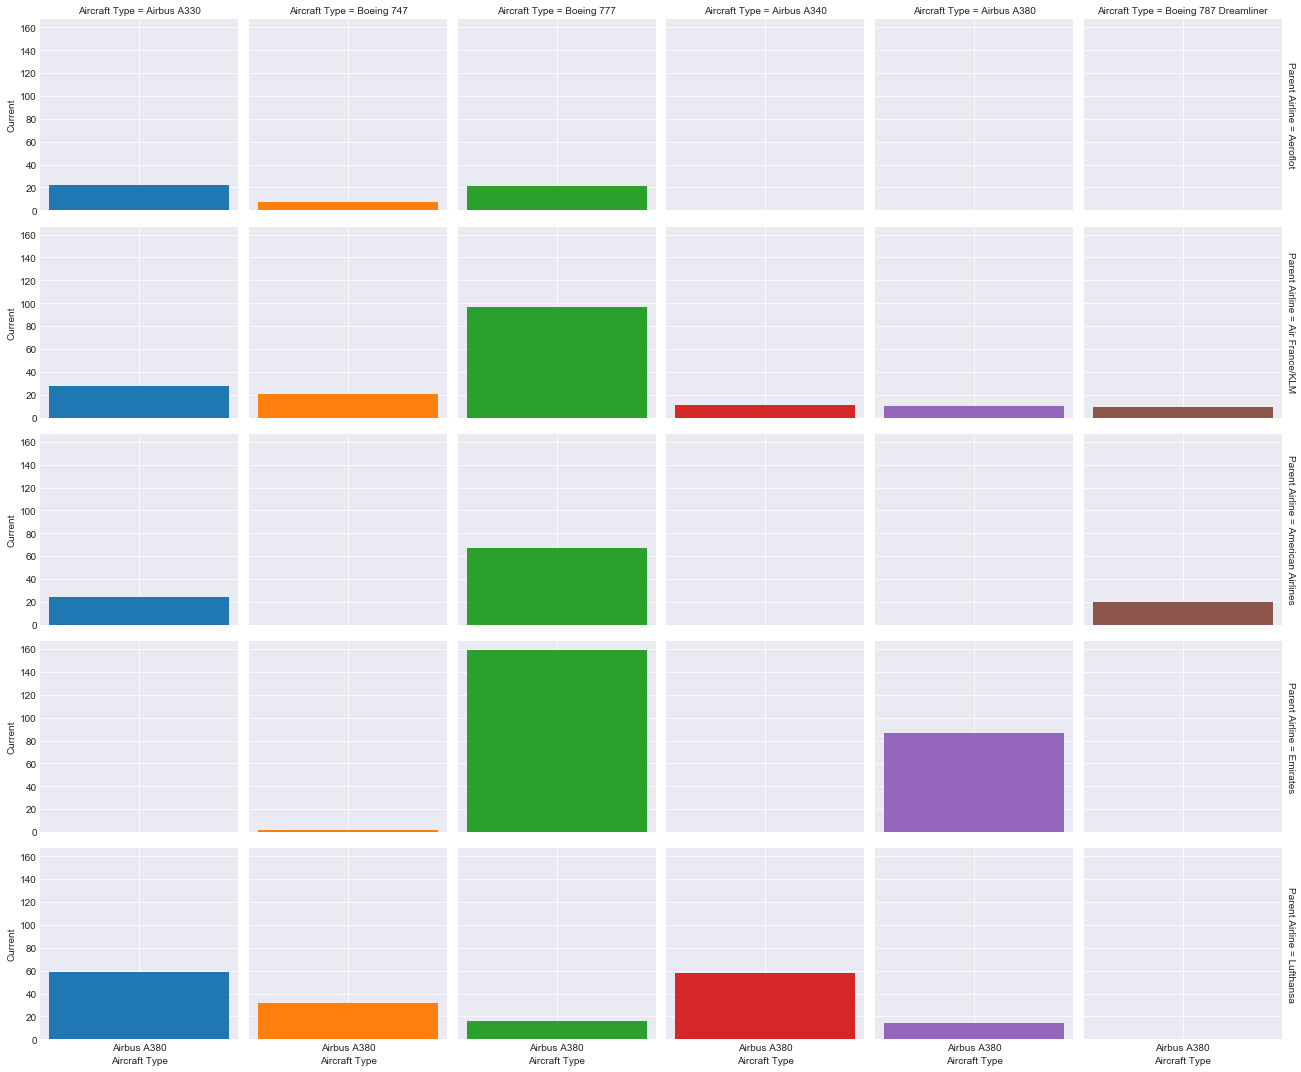

In [629]:
g = sns.FacetGrid(airplanes, row='Parent Airline' , col="Aircraft Type", hue='Aircraft Type', margin_titles=True)
g = g.map(plt.bar, "Aircraft Type", "Current")

# Facit Grid plot to display data abour Airline fleet in details. Columns - Aircraft Type, Rows - Airline

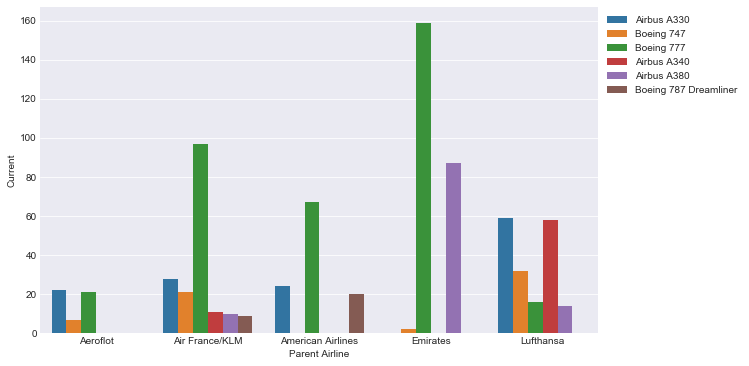

In [628]:
plt.figure(figsize=(10,6))
sns.barplot(data=airplanes, x='Parent Airline',y='Current', hue='Aircraft Type')
plt.legend(bbox_to_anchor=(1, 1.0))

# ALternative barplot graph to make it easier to compare the fleets of different Airlines.